In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
  values: List[int]
  name  : str
  result: str

In [3]:
def process_values(state: AgentState) -> AgentState:
  """This Function handles multiple different inputs"""

  print('Before Updating: ', state)
  state['result'] = f"Hi there {state['name']}! Your sum is = {sum(state['values'])}"
  print('After Updating: ', state)

  return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node('processor', process_values)
graph.set_entry_point('processor')
graph.set_finish_point('processor')

app = graph.compile()

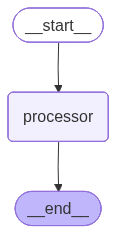

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
answer = app.invoke({'values': [1,2,3,4,5], 'name': 'Sri Harsha'})

Before Updating:  {'values': [1, 2, 3, 4, 5], 'name': 'Sri Harsha'}
After Updating:  {'values': [1, 2, 3, 4, 5], 'name': 'Sri Harsha', 'result': 'Hi there Sri Harsha! Your sum is = 15'}


In [7]:
answer['result']

'Hi there Sri Harsha! Your sum is = 15'

#### Exercise

In [8]:
import math
math.prod([1,2,3])

6

In [9]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
  name     : str
  values   : List[int]
  operator : str
  result   : str

def operation(state: AgentState) -> AgentState:
  """Takes the operator and performs the operation"""

  print('Before Updating: ', state)

  if state['operator'] == '*':
    state['result'] = f"Hi {state['name']}, Your answer is {math.prod(state['values'])}"
  elif state['operator'] == '+':
    state['result'] = f"Hi {state['name']}, Your answer is {sum(state['values'])}"
  else:
    state['result'] = 'Invalid Opeartor'

  print('After Updating: ', state)

  return state

graph = StateGraph(AgentState)
graph.add_node('operator', operation)
graph.set_entry_point('operator')
graph.set_finish_point('operator')
app = graph.compile()

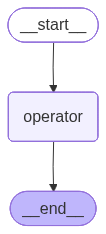

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
final = app.invoke({'name': 'Sri Harsha', 'values':[1,2,3,4,5], 'operator':'+'})

Before Updating:  {'name': 'Sri Harsha', 'values': [1, 2, 3, 4, 5], 'operator': '+'}
After Updating:  {'name': 'Sri Harsha', 'values': [1, 2, 3, 4, 5], 'operator': '+', 'result': 'Hi Sri Harsha, Your answer is 15'}


In [12]:
final["result"]

'Hi Sri Harsha, Your answer is 15'

In [13]:
final = app.invoke({'name': 'Sri Harsha', 'values':[1,2,3,4,5], 'operator':'*'})

Before Updating:  {'name': 'Sri Harsha', 'values': [1, 2, 3, 4, 5], 'operator': '*'}
After Updating:  {'name': 'Sri Harsha', 'values': [1, 2, 3, 4, 5], 'operator': '*', 'result': 'Hi Sri Harsha, Your answer is 120'}


In [14]:
final['result']

'Hi Sri Harsha, Your answer is 120'

In [15]:
final = app.invoke({'name': 'Sri Harsha', 'values':[1,2,3,4,5], 'operator':'-'})

Before Updating:  {'name': 'Sri Harsha', 'values': [1, 2, 3, 4, 5], 'operator': '-'}
After Updating:  {'name': 'Sri Harsha', 'values': [1, 2, 3, 4, 5], 'operator': '-', 'result': 'Invalid Opeartor'}


In [16]:
final['result']

'Invalid Opeartor'